In [1]:
import SAIRD_Feedback as fm
import SIRD_Model

import numpy as np
import csv
import matplotlib.pyplot as plt
import platform

[0, 0.4, 0.0001, 0.013130208403299806, 0.006888686738665914]


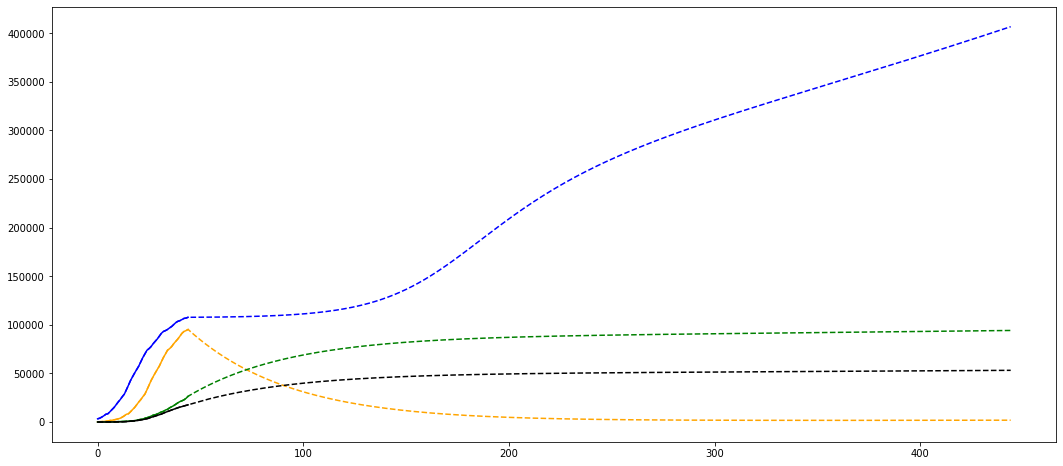

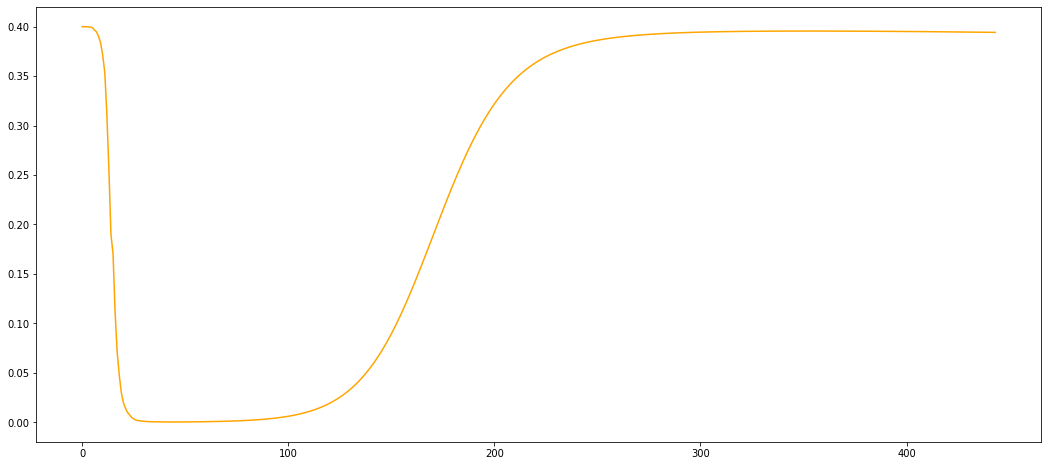

In [29]:
pathc = "../Data/Italian Data/"
if platform.system() == "Windows":
    pathc.replace("/", "\\")
    
filename = "National Data.csv"
dates, infectRaw, recovRaw, deadRaw = SIRD_Model.loadData(pathc + filename)
asymptRaw = fm.calcAsymptomatic(infectRaw, 10)

#set up day range
pop = 60000000
skipDays = 0
numDays = 45 #just to get initial beginning data
daysToPredict = 400
infect = infectRaw[skipDays:numDays]
recov = recovRaw[skipDays:numDays] 
dead = deadRaw[skipDays:numDays]
asympt = asymptRaw[skipDays:numDays]


lamda = 10 #regularization weight
w = 1 #weight decay, when w is 1 there is no decay (all days weighted equal)

q = .09
b2 = 700
b3 = 3

nonLinVars = [q,b2,b3]
linVars = fm.getLinVars(nonLinVars, pop, asympt, infect, recov, dead, lamda, w)
#linVars = fm.getLinVars(nonLinVars, pop, asympt[:-daysToPredict], infect[:-daysToPredict], recov[:-daysToPredict], dead[:-daysToPredict], lamda, w)
linVars[0] = 0
linVars[1] = .4
linVars[2] = .0001
print(linVars)

#predict future time
#constParams = SIRD_Model.calculateConstantParams(infect[:-daysToPredict], recov[:-daysToPredict], dead[:-daysToPredict], pop, q)
#print(constParams)
fm.predictFuture(nonLinVars, linVars, asympt, infect, recov, dead, pop, daysToPredict, graphVals=[1,1,1,1])
#fm.predictMatch(nonLinVars, linVars, asympt, infect, recov, dead, pop, daysToPredict, graphVals=[1,1,1,1])
#SIRD_Model.predictConstMatch(infect, recov, dead, pop, daysToPredict, constParams, q, graphVals=[1,1,0,0])

[6.85481189e-08 1.91029257e-07 3.62410614e-07 1.29107270e-06
 3.51437574e-06 7.33069558e-06 2.49065630e-05 3.92398128e-05
 7.35990795e-05 1.25835187e-04 2.27394696e-04 3.81370213e-04
 8.23242404e-04 1.65466267e-03 3.23328124e-03 3.91940063e-03
 7.54234859e-03 1.34404038e-02 2.12411474e-02 3.55151614e-02
 5.55405413e-02 7.80065227e-02 1.12419576e-01 1.50285921e-01
 2.32188378e-01 3.44635927e-01 4.93767475e-01 6.44226336e-01
 8.13908459e-01 1.00166759e+00 1.20864290e+00 1.51449187e+00
 1.86036275e+00 2.18434936e+00 2.56093987e+00 2.73616746e+00
 2.97160714e+00 3.32178219e+00 3.63765865e+00 3.95375036e+00
 4.36834711e+00 4.82458793e+00 5.13907212e+00 5.28604190e+00]
[0.39999997 0.39999992 0.39999986 0.39999948 0.39999859 0.39999707
 0.39999004 0.3999843  0.39997056 0.39994967 0.39990906 0.39984751
 0.39967097 0.39933923 0.39871086 0.39843836 0.39700565 0.39469514
 0.39168026 0.38628116 0.37895276 0.37105527 0.35957656 0.34773963
 0.32462569 0.29747829 0.26777929 0.24327551 0.22051829 0.19

(0.0, 500.0)

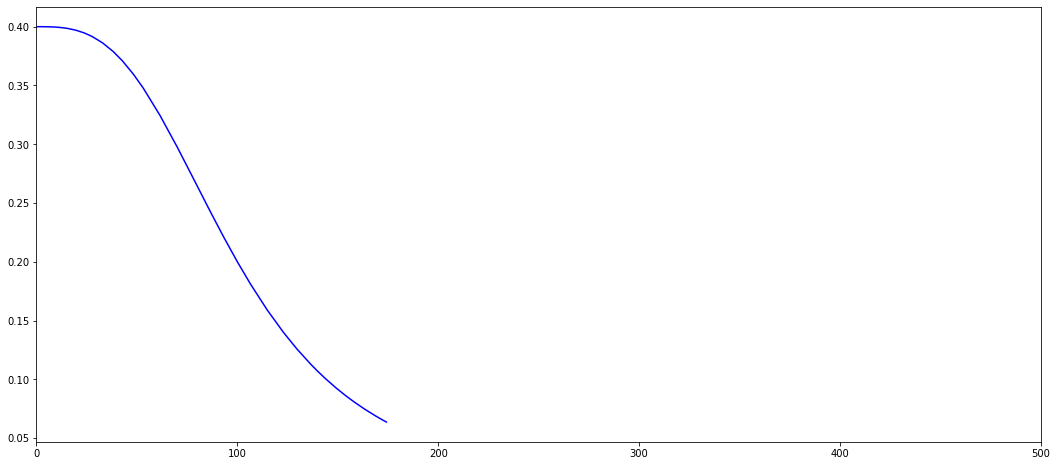

In [25]:
#graph feedback clope
print((nonLinVars[-2]*infect[:-1]/(q*pop))**nonLinVars[-1])
print((linVars[1] / (1 + (nonLinVars[-2]*infect[:-1]/(q*pop))**nonLinVars[-1])))

infectScaled = 10000*(infect[:-1]/(q*pop)) #x axis, infections per 10000
betaY = linVars[0] + (linVars[1] / (1 + (nonLinVars[-2]*infect[:-1]/(q*pop))**nonLinVars[-1]))

fig, ax = plt.subplots(figsize=(18,8))
ax.plot(infectScaled, betaY, color='blue', label='beta by infections') #per 10,000
ax.set_xlim([0,500])

[0.057646362555374586, 0.031968153652521876, 0.000983367504777999]


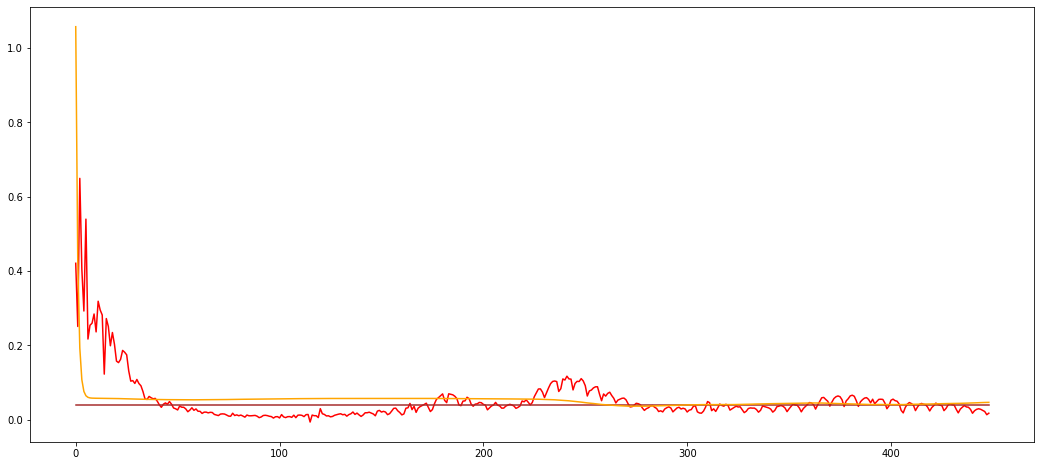

In [3]:
pathc = "../Data/Italian Data/"
if platform.system() == "Windows":
    pathc.replace("/", "\\")
    
filename = "National Data.csv"
dates, infectRaw, recovRaw, deadRaw = SIRD_Model.loadData(pathc + filename)

#set up day range
pop = 60000000
skipDays = 0
numDays = len(infectRaw) #max days
infect = infectRaw[skipDays:numDays]
recov = recovRaw[skipDays:numDays] 
dead = deadRaw[skipDays:numDays]

#set up constraints
#boundQ =     (.09,  .09) #q should be between 0 and 1
#boundAlpha = (0,   1.00)
#boundC =     (0,      0)
#boundB1 =    (0,     10)
#boundB2 =    (1,      4)

lamda = 10 #regularization weight
wVal = 1 #weight decay, when w is 1 there is no decay (all days weighted equal)

#q = .09
#alpha = .1
#C = 0
#b1 = 10
#b2 = 2

nonLinVars = [q,alpha,C,b1,b2]
linVars = fm.getLinVarsSIRD(nonLinVars, pop, infect, recov, dead, lamda, w)

print(linVars)


betaConst = SIRD_Model.calculateConstantParams(infect, recov, dead, pop, q)[0]
betaConstGraph = np.ones((len(infect)-1))*betaConst #fill array with const value

fig2, ax2 = plt.subplots(figsize=(18,8))
ax2.plot(SIRD_Model.calculateAverageParams(infect, recov, dead, pop, q, graph=False)[:,0], color="red") #time varying beta
ax2.plot(betaConstGraph, color="brown") #constant beta
ax2.plot(fm.calculateBeta(nonLinVars, linVars, pop, infect), color="orange") #feedback beta